## Generate Cities List

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
#from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [3]:
# Perform API Calls and save base url information.
url = "http://api.openweathermap.org/data/2.5/weather?"

#Create a list to store the weather data
lat = []
lng = []
maxtemp = []
humid = []
cloud = []
wind = []
country = []
date = []
citynm = []
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

print("Begin Data Retrieval")
print("--------------------------")

#loop through all the cities in the city list to find the weather data required
for index , city in enumerate(cities):  
    
        
    try:
    
        weather_response = requests.get(query_url + city).json()     
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        maxtemp.append(weather_response['main']['temp_max'])
        humid.append(weather_response['main']['humidity'])
        cloud.append(weather_response['clouds']['all'])
        wind.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        citynm.append(city)

        #Create a print log for each city as processed     
        
        print(f"Processing record {index} of Data Set 1 | {city}") 
        time.sleep(3)
    
    except:
        print("city not found")
    

Begin Data Retrieval
--------------------------
Processing record 0 of Data Set 1 | conceicao do araguaia
Processing record 1 of Data Set 1 | luderitz
Processing record 2 of Data Set 1 | kapaa
Processing record 3 of Data Set 1 | bethel
Processing record 4 of Data Set 1 | ambon
Processing record 5 of Data Set 1 | arkhara
Processing record 6 of Data Set 1 | busselton
Processing record 7 of Data Set 1 | upernavik
Processing record 8 of Data Set 1 | mao
Processing record 9 of Data Set 1 | tuktoyaktuk
Processing record 10 of Data Set 1 | lisakovsk
city not found
Processing record 12 of Data Set 1 | nuevo ideal
Processing record 13 of Data Set 1 | bardiyah
Processing record 14 of Data Set 1 | touros
city not found
Processing record 16 of Data Set 1 | bredasdorp
Processing record 17 of Data Set 1 | port elizabeth
Processing record 18 of Data Set 1 | vaini
Processing record 19 of Data Set 1 | vila velha
Processing record 20 of Data Set 1 | jamestown
Processing record 21 of Data Set 1 | punta a

Processing record 188 of Data Set 1 | olavarria
Processing record 189 of Data Set 1 | vydrino
Processing record 190 of Data Set 1 | plettenberg bay
Processing record 191 of Data Set 1 | tanout
Processing record 192 of Data Set 1 | labrea
Processing record 193 of Data Set 1 | shiyan
Processing record 194 of Data Set 1 | catalao
Processing record 195 of Data Set 1 | lompoc
Processing record 196 of Data Set 1 | guerrero negro
city not found
Processing record 198 of Data Set 1 | ligayan
Processing record 199 of Data Set 1 | ambulu
Processing record 200 of Data Set 1 | assiniboia
city not found
Processing record 202 of Data Set 1 | morehead
Processing record 203 of Data Set 1 | yaan
Processing record 204 of Data Set 1 | chokurdakh
Processing record 205 of Data Set 1 | presidencia roque saenz pena
Processing record 206 of Data Set 1 | ife
Processing record 207 of Data Set 1 | luanda
Processing record 208 of Data Set 1 | vozrozhdeniye
Processing record 209 of Data Set 1 | chuy
Processing reco

Processing record 373 of Data Set 1 | pangnirtung
Processing record 374 of Data Set 1 | gat
Processing record 375 of Data Set 1 | chiang khong
Processing record 376 of Data Set 1 | yulara
Processing record 377 of Data Set 1 | victoria
city not found
Processing record 379 of Data Set 1 | kawhia
Processing record 380 of Data Set 1 | tarko-sale
Processing record 381 of Data Set 1 | otane
Processing record 382 of Data Set 1 | kaele
Processing record 383 of Data Set 1 | tutoia
Processing record 384 of Data Set 1 | dwarka
Processing record 385 of Data Set 1 | estelle
Processing record 386 of Data Set 1 | peruibe
Processing record 387 of Data Set 1 | henties bay
Processing record 388 of Data Set 1 | caluquembe
Processing record 389 of Data Set 1 | puerto ayacucho
Processing record 390 of Data Set 1 | buala
Processing record 391 of Data Set 1 | bafq
Processing record 392 of Data Set 1 | scharding
Processing record 393 of Data Set 1 | baykit
Processing record 394 of Data Set 1 | taywarah
Proces

city not found
Processing record 554 of Data Set 1 | ferrol
Processing record 555 of Data Set 1 | terrace bay
Processing record 556 of Data Set 1 | big rapids
Processing record 557 of Data Set 1 | quatre cocos
Processing record 558 of Data Set 1 | malanje
Processing record 559 of Data Set 1 | matara
Processing record 560 of Data Set 1 | davidson
Processing record 561 of Data Set 1 | eufaula
Processing record 562 of Data Set 1 | shubarkuduk
Processing record 563 of Data Set 1 | puteyets
Processing record 564 of Data Set 1 | pozo colorado
Processing record 565 of Data Set 1 | cantaura
Processing record 566 of Data Set 1 | leh
Processing record 567 of Data Set 1 | santa barbara
Processing record 568 of Data Set 1 | san roque
Processing record 569 of Data Set 1 | ixtapa
Processing record 570 of Data Set 1 | garmsar
Processing record 571 of Data Set 1 | cuite
city not found
Processing record 573 of Data Set 1 | kibala
Processing record 574 of Data Set 1 | freetown
Processing record 575 of D

In [4]:
# create a data frame containing the weather data for the cities
weather_dict = {
    "City": citynm,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": maxtemp,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date}

city_df = pd.DataFrame(weather_dict)
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,conceicao do araguaia,-8.2578,-49.2647,73.49,96,100,3.94,BR,1612663380
1,luderitz,-26.6481,15.1594,67.42,70,0,22.70,NA,1612663104
2,kapaa,22.0752,-159.3190,73.40,53,75,6.91,US,1612663389
3,bethel,41.3712,-73.4140,35.01,59,1,4.74,US,1612662990
4,ambon,-3.6954,128.1814,89.60,62,40,5.75,ID,1612663039


In [5]:
#show the city_df data frame with statistical analysis applied
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,19.594112,20.340061,49.304852,73.572174,51.488696,7.936209,1.612664e+09
std,32.819966,89.917308,31.471249,18.839167,40.972534,5.913371,6.328804e+02
min,-54.800000,-179.166700,-42.000000,1.000000,0.000000,0.270000,1.612663e+09
25%,-7.364600,-59.559850,29.615000,64.000000,1.000000,3.440000,1.612664e+09
50%,24.600000,26.891000,60.010000,79.000000,62.000000,6.440000,1.612664e+09
75%,46.945750,96.249250,74.380000,87.000000,91.500000,11.015000,1.612665e+09
max,78.218600,178.416700,95.000000,100.000000,100.000000,31.070000,1.612665e+09


In [6]:
# Export city data as a CSV
city_df.to_csv("../weatherpy/city_df.csv", encoding="utf-8", index=False, header=True)

In [ ]:
#Reviewed data set and no cities with humidity >100%  

## Latitude vs. Temperature Plot

C:\Users\ljean\anaconda3\envs\PythonData2\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


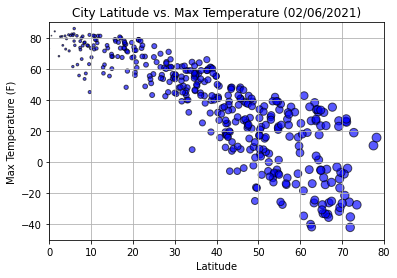

In [7]:
#plot scatter for City Latitude vs. Max Temp
clat = city_df['Lat']
fmax_temp = city_df['Max Temp']

plt.scatter(clat, fmax_temp, marker="o", facecolors="blue", edgecolors="black", s=clat, alpha=0.65)

#set x and y limits
plt.xlim(0, 80)
plt.ylim(-50,90)

plt.title("City Latitude vs. Max Temperature (02/06/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid()
plt.savefig("scatterplt1.jpg")
plt.show()

## Latitude vs. Humidity Plot

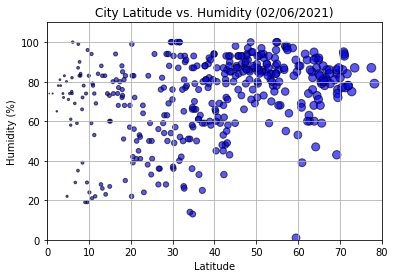

In [8]:
#plat scatter for City Latitude vs. Humidity
clat = city_df['Lat']
chumidity = city_df['Humidity']

plt.scatter(clat, chumidity, marker="o", facecolors="blue", edgecolors="black", s=clat, alpha=0.65)

#set x and y limits
plt.xlim(0, 80)
plt.ylim(0,110)

plt.title("City Latitude vs. Humidity (02/06/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()
plt.savefig("scatterplt2.jpg")
plt.show()

## Latitude vs. Cloudiness Plot

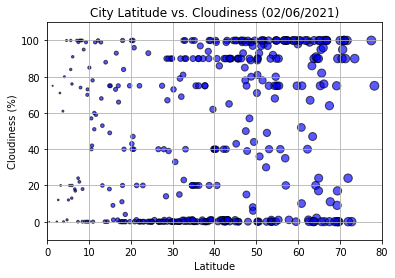

In [9]:
#plat scatter for City Latitude vs. Cloudiness
clat = city_df['Lat']
cclouds = city_df['Cloudiness']

plt.scatter(clat, cclouds, marker="o", facecolors="blue", edgecolors="black", s=clat, alpha=0.65)

#set x and y limits
plt.xlim(0,80)
plt.ylim(-10,110)

plt.title("City Latitude vs. Cloudiness (02/06/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid()
plt.savefig("scatterplt3.jpg")
plt.show()

## Latitude vs. Wind Speed Plot

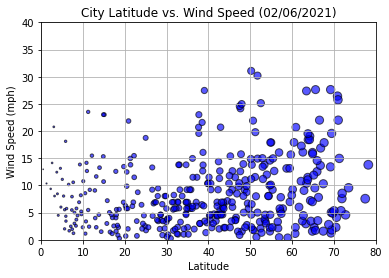

In [10]:
#plat scatter for City Latitude vs. Cloudiness
clat = city_df['Lat']
cwind = city_df['Wind Speed']

plt.scatter(clat, cwind, marker="o", facecolors="blue", edgecolors="black", s=clat, alpha=0.65)

#set x and y limits
plt.xlim(0,80)
plt.ylim(0,40)

plt.title("City Latitude vs. Wind Speed (02/06/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid()
plt.savefig("scatterplt4.jpg")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [11]:
#Create new databases for nothern and southern hemispheres
ndf = city_df.loc[city_df["Lat"] >= 0]
sdf = city_df.loc[city_df["Lat"] < 0]

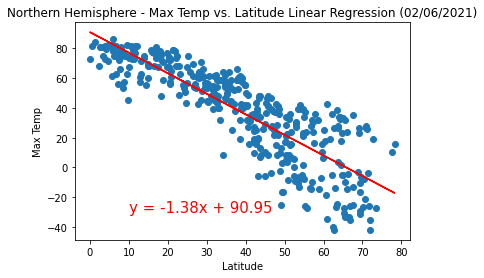

In [12]:
#Perform the linear regression on the scatter plot on Northern Hemisphere - Max Temp vs. Latitude
nlat = ndf["Lat"]
max_temp = ndf["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(nlat, max_temp)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nlat, max_temp)
plt.plot(nlat, regress_values,"r-")
plt.annotate(line_eq,(10,-30),fontsize=15,color="red")

plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression (02/06/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig("linplt1.jpg")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

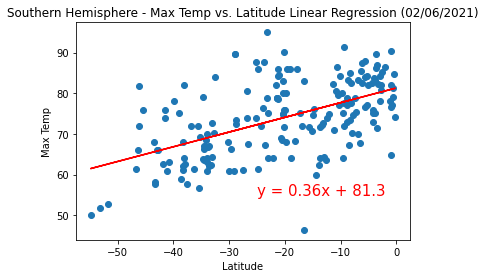

In [13]:
#Perform the linear regression on the scatter plot on Southern Hemisphere - Max Temp vs. Latitude
slat = sdf["Lat"]
smax_temp = sdf["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(slat, smax_temp)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(slat, smax_temp)
plt.plot(slat, regress_values,"r-")
plt.annotate(line_eq,(-25,55),fontsize=15,color="red")

plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression (02/06/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig("linplt2.jpg")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

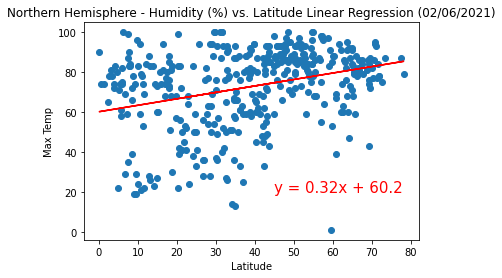

In [14]:
#Perform the linear regression on the scatter plot on Northern Hemisphere - Humidity (%) vs. Latitude
nlat = ndf["Lat"]
humidity = ndf["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(nlat, humidity)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nlat, humidity)
plt.plot(nlat, regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")

plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (02/06/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig("linplt3.jpg")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

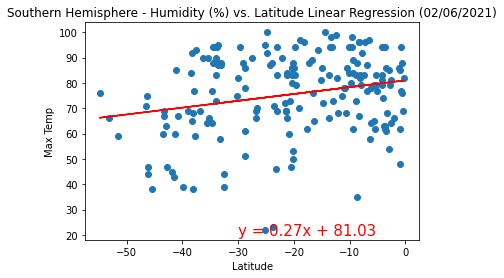

In [15]:
#Perform the linear regression on the scatter plot on Southern Hemisphere - Humidity (%) vs. Latitude
slat = sdf["Lat"]
shumidity = sdf["Humidity"]
                                         
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(slat,shumidity)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(slat, shumidity)
plt.plot(slat, regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")

plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (02/06/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig("linplt4.jpg")                         
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

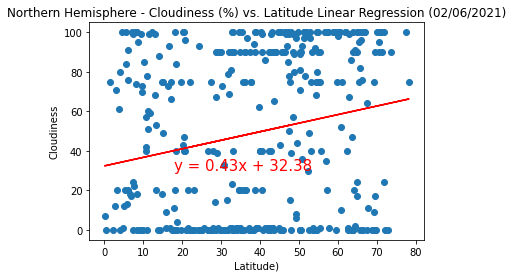

In [16]:
#Perform the linear regression on the scatter plot on Northern Hemisphere - Cloudiness (%) vs. Latitude
nlat = ndf["Lat"]
clouds = ndf["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(nlat, clouds)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nlat, clouds)
plt.plot(nlat, regress_values,"r-")
plt.annotate(line_eq,(18,30),fontsize=15,color="red")

plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (02/06/2021)')
plt.xlabel('Latitude)')
plt.ylabel('Cloudiness')
plt.savefig("linplt5.jpg")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

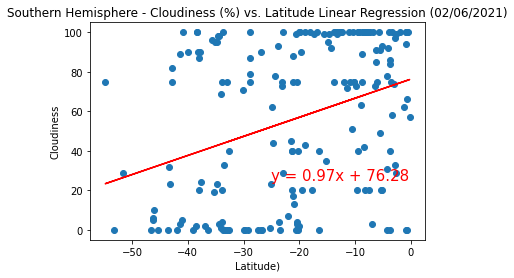

In [17]:
#Perform the linear regression on the scatter plot on Southern Hemisphere - Cloudiness (%) vs. Latitude
slat = sdf["Lat"]
sclouds = sdf["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(slat, sclouds)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(slat, sclouds)
plt.plot(slat, regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")

plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (02/06/2021)')
plt.xlabel('Latitude)')
plt.ylabel('Cloudiness')
plt.savefig("linplt6.jpg")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

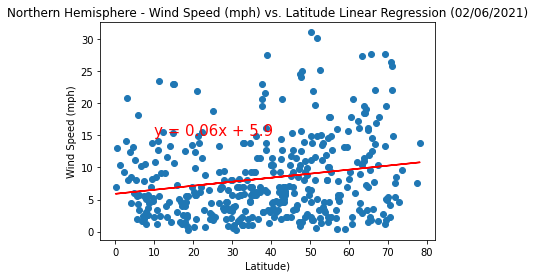

In [18]:
#Perform the linear regression on the scatter plot on Northern Hemisphere - Wind Speed (mph) vs. Latitude
nlat = ndf["Lat"]
wind = ndf["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(nlat, wind)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nlat, wind)
plt.plot(nlat, regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")

plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (02/06/2021)')
plt.xlabel('Latitude)')
plt.ylabel('Wind Speed (mph)')
plt.savefig("linplt7.jpg")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

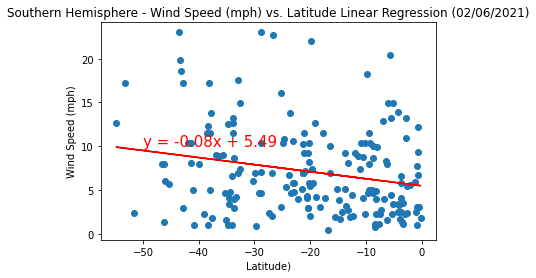

In [19]:
#Perform the linear regression on the scatter plot on Southern Hemisphere - Wind Speed (mph) vs. Latitude
slat = sdf["Lat"]
swind = sdf["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(slat,swind)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(slat, swind)
plt.plot(slat, regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (02/06/2021)')
plt.xlabel('Latitude)')
plt.ylabel('Wind Speed (mph)')
plt.savefig("linplt8.jpg")
plt.show()